In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Load data from CSV file
data = pd.read_csv("actual_data_bms.csv")

# Split data into input and output
X = data.drop('soc', axis=1).values
y = data['soc'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reshape input data for CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32)
# Load the saved model
model = load_model('soc_model.h5')

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print('MSE', mse)
print('RMSE', rmse)
print('MAE', mae)




Epoch 1/50
184/184 [==============================] - 1s 2ms/step - loss: 0.2995
Epoch 2/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 3/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 4/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 5/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 6/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 7/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 8/50
184/184 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 9/50
184/184 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 10/50
184/184 [==============================] - 1s 5ms/step - loss: 0.0040
Epoch 11/50
184/184 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 12/50
184/184 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 13/50
184/184 [====

In [ ]:
y_pred=model.predict(X_test)
np.set_printoptions(precision=5)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)), 1)

46/46 [==============================] - 0s 1ms/step


array([[0.85535, 0.76186],
       [0.92491, 0.9366 ],
       [0.72077, 0.68657],
       ...,
       [0.47074, 0.45518],
       [0.07522, 0.05622],
       [0.55106, 0.54062]])

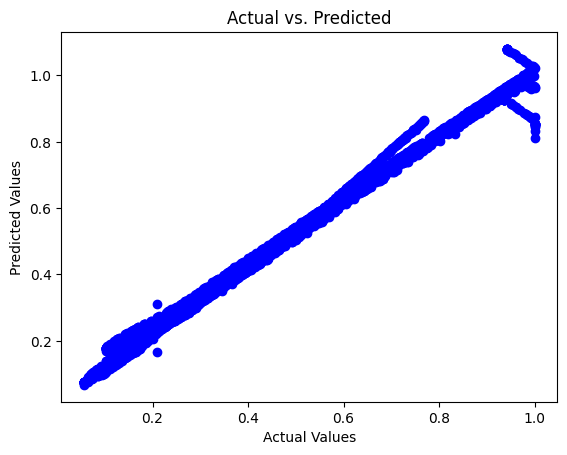

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are numpy arrays containing the actual and predicted values respectively

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()

In [ ]:
# import numpy as np
# from keras.models import load_model

# # Load the model
# model = load_model("/content/soc_model.h5")

# # Define a dataset of SOC values to test the model with
# test_data = np.array([[4.17301,-0.14558, 9.14879, -0.00245], [3.19283, 0.07856, 5.93819, -0.00984]])

# # Reshape the test data for the CNN model
# test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], 1)

# # Make predictions on the test data
# predictions = model.predict(test_data)

# # Print the predicted SOC values
# print('Predicted SOC values:', predictions.flatten())
